In [261]:
import yfinance as yf
import numpy as np
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [262]:
# fetches per-month FF3 Factor data for specified timeframe using Ken French library
def fetch_ff3_data(start_date, end_date):
    ff_data = web.DataReader('F-F_Research_Data_Factors', 'famafrench', start=start_date, end=end_date)
    del(ff_data["DESCR"], ff_data[1])
    ff_data = pd.DataFrame(ff_data[0]) / 100
    return(ff_data)

In [263]:
# fetches monthly relative returns for specified timeframe using yfinance. Can be transformed into stock data loader by removing
# bottom code
def rel_returns(ticker_symbol, start_date, end_date):
    resample_logic = {"Open" : "first",
                      "High" : "max",
                      "Low" : "min",
                      "Close": "last",
                      "Volume" : "sum",
                     }
    data = yf.Ticker(ticker_symbol).history(start = start_date, end = end_date)
    monthly_data = data.resample("ME").agg(resample_logic)
    monthly_returns = monthly_data["Close"].pct_change().dropna()
    monthly_returns.columns = "Relative Returns"
    return(monthly_returns)

In [264]:
# requires array of stock we want to test to compute excess returns
def excess_returns(arr):
    arr.index = ff3.index
    Y = arr - ff3.iloc[:,3]
    return Y

In [265]:
# do we need this extra or is it better to have everything in OLS?
def reg_X():
    X = ff3.iloc[:,0:3]
    X = sm.add_constant(X)
    return X

In [267]:
def OLS_Regression(Stock, X):
    model = sm.OLS(Stock, X)
    results = model.fit()
    return results.summary()

In [293]:
# Function for plotting Data

def stock_plot(arr, title, labelx, labely, grid_stat=True):

    if not isinstance(title, str):
        raise TypeError(f"Expected String input, instead received {type(title)}")
    if not isinstance(labelx, str):
        raise TypeError(f"Expected String input, instead received {type(labelx)}")
    if not isinstance(labely, str):
        raise TypeError(f"Expected String input, instead received {type(labely)}")
    if not isinstance(grid_stat, bool):
        raise TypeError(f"Expected True or False, instead received {type(grid_stat)}")

    x_axis = np.linspace(start=arr.index.year[1], stop=arr.index.year[-1], num= arr.index.year.size)
    
    plt.figure(figsize=(10, 6))
    plt.plot(x_axis, arr)
    plt.title(title)
    plt.ylabel(labely)
    plt.xlabel(labelx)
    plt.grid(grid_stat)
    plt.show()



In [183]:
# TESTING BLOCK:

In [290]:
ff3 = fetch_ff3_data("2018-01-01", "2024-12-31")
apple_er = excess_returns(rel_returns("AAPL", "2017-12-01", "2024-12-31"))

/var/folders/lg/8378lyw55rqdlc0qt63jgcy00000gn/T/ipykernel_49078/3360809208.py:3: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  ff_data = web.DataReader('F-F_Research_Data_Factors', 'famafrench', start=start_date, end=end_date)
/var/folders/lg/8378lyw55rqdlc0qt63jgcy00000gn/T/ipykernel_49078/3360809208.py:3: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  ff_data = web.DataReader('F-F_Research_Data_Factors', 'famafrench', start=start_date, end=end_date)


In [291]:
reg = reg_X()
reg


,const,Mkt-RF,SMB,HML
Date,,,,
2018-01,1.0,0.0558,-0.0316,-0.0132
2018-02,1.0,-0.0364,0.0027,-0.0110
2018-03,1.0,-0.0235,0.0405,-0.0021
2018-04,1.0,0.0027,0.0109,0.0053
2018-05,1.0,0.0266,0.0524,-0.0314
...,...,...,...,...
2024-08,1.0,0.0160,-0.0349,-0.0110
2024-09,1.0,0.0172,-0.0013,-0.0277
2024-10,1.0,-0.0100,-0.0099,0.0086


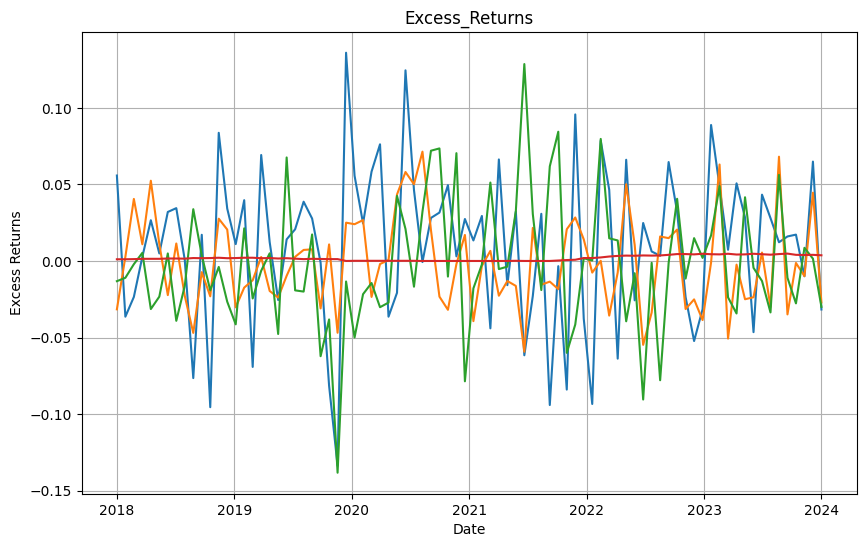

In [296]:
stock_plot(ff3, "Excess_Returns", "Date", "Excess Returns", True)

In [283]:
print(OLS_Regression(apple_er, reg))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                     32.79
Date:                Thu, 13 Nov 2025   Prob (F-statistic):           6.37e-14
Time:                        15:39:40   Log-Likelihood:                 122.05
No. Observations:                  84   AIC:                            -236.1
Df Residuals:                      80   BIC:                            -226.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0107      0.007      1.647      0.1